# Heart Disease Statlog Analysis and Prediction

In this project, I analyze the Statlog Heart Disease dataset to understand which clinical features are most associated with heart disease and to build a prediction model. The dataset contains 271 patients with 13 clinical features (age, chest pain type, blood pressure, cholesterol, ECG results, etc.) and a target label indicating the presence or absence of heart disease.


## Data Understanding

Key columns:

- **age** – Age in years.  
- **sex** – 1 = male, 0 = female.  
- **cp** – Chest pain type (0–3: from typical angina to asymptomatic).  
- **trestbps** – Resting blood pressure (mm Hg).  
- **chol** – Serum cholesterol (mg/dl).  
- **fbs** – Fasting blood sugar > 120 mg/dl (1 = yes, 0 = no).  
- **restecg** – Resting ECG results (0–2).  
- **thalach** – Maximum heart rate achieved.  
- **exang** – Exercise‑induced angina (1 = yes, 0 = no).  
- **oldpeak** – ST depression induced by exercise relative to rest.  
- **slope** – Slope of the peak exercise ST segment (0–2).  
- **ca** – Number of major vessels (0–3) colored by fluoroscopy.  
- **thal** – Thalassemia test result (3 = normal, 6 = fixed defect, 7 = reversible defect).  
- **target** – 0 = no heart disease, 1 = heart disease.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [3]:
print(pd.__version__)

1.5.3


In [4]:
heart_df = pd.read_csv("Heart_disease_statlog.csv")


In [5]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [16]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [17]:
heart_df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


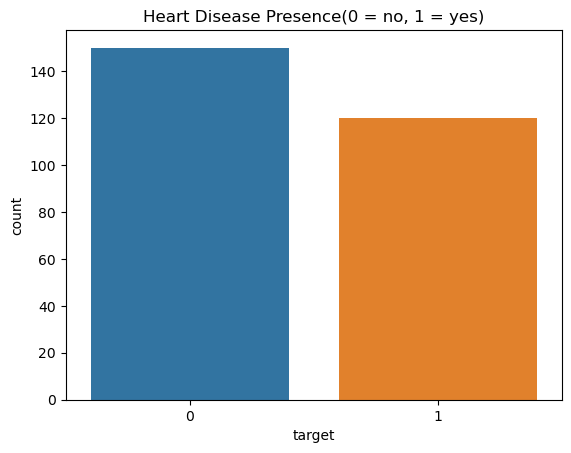

In [18]:
#patients with heart disease vs. those without
sns.countplot(x="target", data=heart_df)
plt.title("Heart Disease Presence(0 = no, 1 = yes)")
plt.show()

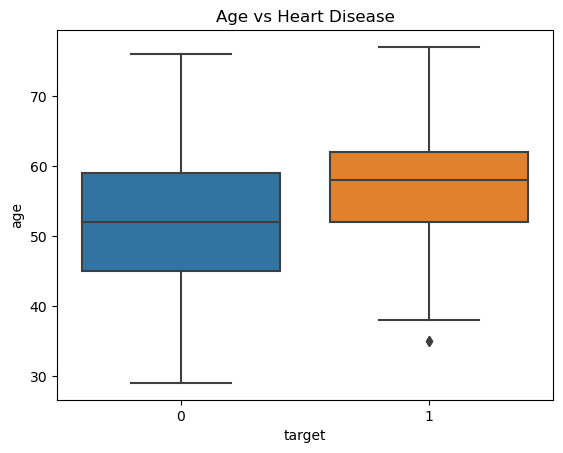

In [21]:
#distinguish based on age split
sns.boxplot(x="target", y="age", data=heart_df)
plt.title("Age vs Heart Disease")
plt.show()

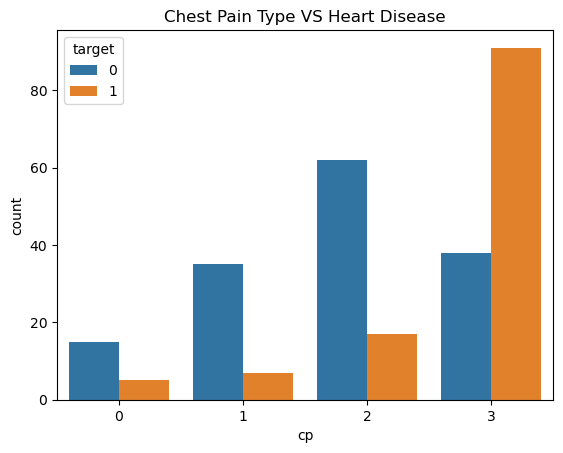

In [24]:
#another example looking at the type of chest pain vs disease
sns.countplot(x="cp", hue="target", data=heart_df)
plt.title("Chest Pain Type VS Heart Disease")
plt.show()

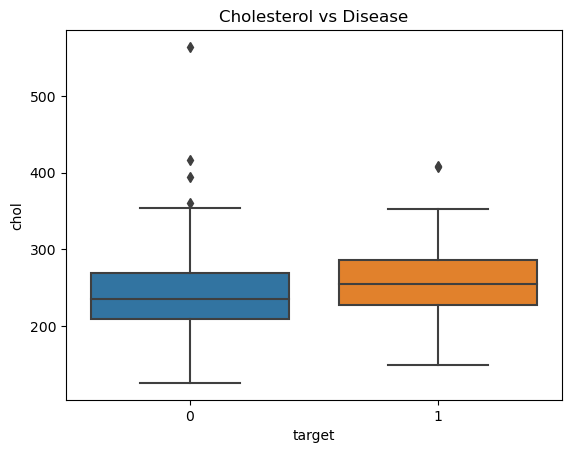

In [25]:
#cholesterol vs disease
sns.boxplot(x="target", y="chol", data=heart_df)
plt.title("Cholesterol vs Disease")
plt.show()

In [8]:
#building simple prediction model
features =["age", "cp", "trestbps", "chol", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
X = heart_df[features]
y = heart_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200, random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

## Modeling
We train a Random Forest classifier using 10 clinical features and an 80/20 train–test split to predict the `target` label (heart disease yes/no).


In [45]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



- The random forest achieved about 83% accuracy on the test set. It obtained F1 scores of 0.85 for the no‑disease class (0) and 0.82 for the heart‑disease class (1). The confusion matrix shows 25 true negatives, 20 true positives, 5 false positives, and 4 false negatives, so the model catches most disease cases while keeping false alarms relatively low.


In [12]:
#feature importances to find which factors matter
importances = rf.feature_importances_
for name, imp in sorted(zip(features, importances), key=lambda x: -x[1]):
    print(f"{name}:{imp:.3f}")

cp:0.136
thal:0.134
ca:0.129
oldpeak:0.120
thalach:0.103
chol:0.094
age:0.085
trestbps:0.081
slope:0.068
exang:0.051


- The most important features for predicting heart disease in our model are chest pain type (`cp`), thalassemia result (`thal`), number of major vessels (`ca`), ST depression (`oldpeak`), and maximum heart rate (`thalach`).


## Exploratory Data Analysis


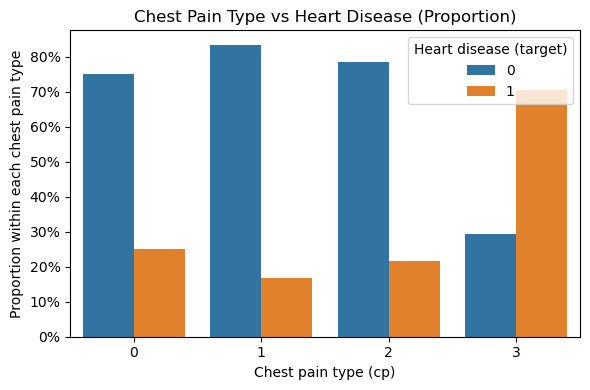

In [42]:
#the most important factors for predicting heart disease are chestpain, thalassemia test result, and number of major vessels(ca), oldpeak(ST depression), and thalack(max heart rate)
#For Chest Pain, we can see that patients with cp=3 have a much higher proportion of heart disease than patients with other types
counts = heart_df.groupby(["cp", "target"]).size().reset_index(name="count")
totals = counts.groupby("cp")["count"].transform("sum")
counts["prop"] = counts["count"] / totals
cp_target = counts

plt.figure(figsize=(6,4))
sns.barplot(data=cp_target, x="cp", y="prop", hue="target")
plt.title("Chest Pain Type vs Heart Disease (Proportion)")
plt.ylabel("Proportion within each chest pain type")
plt.xlabel("Chest pain type (cp)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))
plt.legend(title="Heart disease (target)")
plt.tight_layout()
plt.show()


- Patients with chest pain type cp = 3 (asymptomatic / non‑anginal) have about 70% prevalence of heart disease.  
- For cp = 0–2, most patients do not have heart disease, so chest pain pattern is a strong risk signal.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


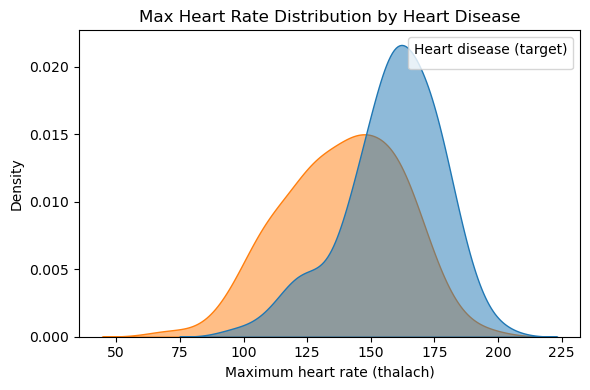

In [43]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=heart_df,
    x="thalach",
    hue="target",
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title("Max Heart Rate Distribution by Heart Disease")
plt.xlabel("Maximum heart rate (thalach)")
plt.ylabel("Density")
plt.legend(title="Heart disease (target)")
plt.tight_layout()
plt.show()

#People without heart disease tend to reach higher maximum heart rate(thalach), while thoese with disease tend to stay around lower rates

- Patients with chest pain type cp = 3 (asymptomatic / non‑anginal) have about 70% prevalence of heart disease.  
- For cp = 0–2, most patients do not have heart disease, so chest pain pattern is a strong risk signal.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


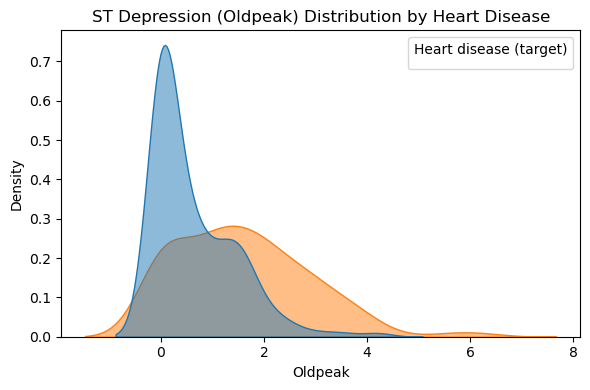

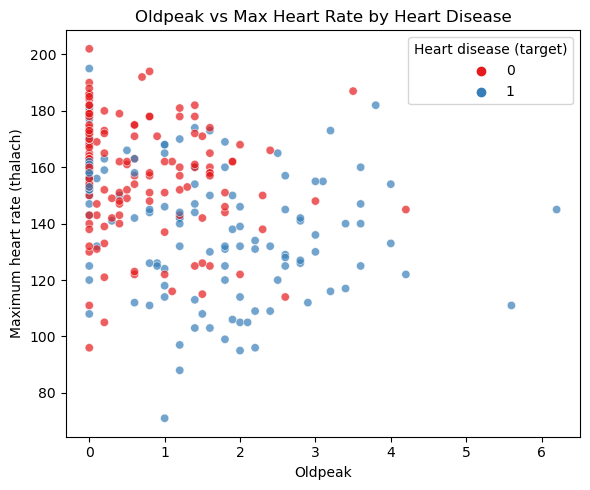

In [32]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=heart_df,
    x="oldpeak",
    hue="target",
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title("ST Depression (Oldpeak) Distribution by Heart Disease")
plt.xlabel("Oldpeak")
plt.ylabel("Density")
plt.legend(title="Heart disease (target)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=heart_df,
    x="oldpeak",
    y="thalach",
    hue="target",
    palette="Set1",
    alpha=0.7
)
plt.title("Oldpeak vs Max Heart Rate by Heart Disease")
plt.xlabel("Oldpeak")
plt.ylabel("Maximum heart rate (thalach)")
plt.legend(title="Heart disease (target)")
plt.tight_layout()
plt.show()

In [ ]:
- Patients without heart disease tend to reach higher maximum heart rates, while disease patients cluster at lower thalach values.
- Oldpeak values are noticeably higher in patients with heart disease, supporting its role as an important predictor.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = ["age", "cp", "trestbps", "chol", "thalach",
            "exang", "oldpeak", "slope", "ca", "thal"]
X = heart_df[features]
y = heart_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54

[[25  5]
 [ 4 20]]


In [34]:
#function that prints risk prediction for a new patient
def predict_risk(sample_dict):
    sample_df = pd.DataFrame([sample_dict])[features]
    proba = rf.predict_proba(sample_df)[0,1]
    pred = rf.predict(sample_df)[0]
    return pred, proba

predict_risk({"age": 55, "cp": 3, "trestbps": 140, "chol": 250, "thalach": 140, "exang": 1, "oldpeak": 2.0,"slope": 2, "ca": 1, "thal": 7})



(1, 0.985)

- For this example patient with asymptomatic chest pain (cp = 3), high cholesterol, moderate blood pressure, and abnormal thal/ca values, the model predicts that the patient **HAS heart disease** with very high probability.


In [40]:
#making the results more obvious to the eye instead of returning the tuple
def clear_predict(sample_dict):
    pred, proba = predict_risk(sample_dict)
    label = "HAS Heart Disease" if pred == 1 else "does NOT have heart disease"
    print(f"Model prediction: patient {label} (probability = {proba:.1%})")
    
clear_predict({"age": 55, "cp": 3, "trestbps": 140, "chol": 250, "thalach": 140, "exang": 1, "oldpeak": 2.0,"slope": 2, "ca": 1, "thal": 7})

Model prediction: patient HAS Heart Disease (probability = 98.5%)


## Conclusion and Future Work

- In this project, I analyzed the Statlog Heart Disease dataset to understand which clinical traits are most associated with heart disease and to build a prediction model. Chest pain type, thalassemia result, number of affected vessels, ST depression (`oldpeak`), and maximum heart rate (`thalach`) emerged as the most important predictors. Patients who are asymptomatic (cp = 3), have higher oldpeak, more affected vessels, and lower max heart rate are much more likely to be classified as having heart disease. A random forest model reached about 83% accuracy and reasonably balanced precision and recall across both classes.

- Future work could compare this model to logistic regression or gradient boosting, perform hyperparameter tuning with cross‑validation, and evaluate on a larger and more diverse patient cohort. An interactive app (e.g., with Streamlit) could also turn the prediction function into a simple risk‑calculator demo for educational purposes.
